In [4]:
import numpy as np 
import pandas as pd
import cv2 as cv 
import os
from ComputeStereo import computeStereoCorrespondance
import matplotlib.pyplot as plt

In [5]:
class ImportKittyDataset(): 
    def __init__(self, img_sequance = '00'):
        
        self.sequance_dir = '../KITTY_dataset/sequences/{}/'.format(img_sequance) # directory of images
        self.ground_truth_poses_dir = '../KITTY_dataset/ground_truth_poses/{}.txt'.format(img_sequance) 
        
        self.L_camera_imgs_dir = sorted(os.listdir(self.sequance_dir + 'image_0'))
        self.R_camera_imgs_dir = sorted(os.listdir(self.sequance_dir + 'image_1'))
        self.imgs_num = len(self.L_camera_imgs_dir)
            
        calib = pd.read_csv('../KITTY_dataset/sequences/{}/calib.txt'.format(img_sequance), delimiter=' ',header=None, index_col=0)
        self.P0 = np.array(calib.loc['P0:']).reshape((3,4))
        self.P1 = np.array(calib.loc['P1:']).reshape((3,4)) # P0 and P1 are for grayscale images 
        self.P2 = np.array(calib.loc['P2:']).reshape((3,4)) # P2 and P3 are for RGB images
        self.P3 = np.array(calib.loc['P3:']).reshape((3,4))
        
        self.times = np.array(pd.read_csv(self.sequance_dir + 'times.txt', delimiter=' ', header=None))
        
        print('number of frames', self.imgs_num)
        print('Left camera matrix = \n', self.P0)
        print('Right camera matrix = \n', self.P1)
        
        
    def getGTposes(self): 
        ground_truth_poses = pd.read_csv(self.ground_truth_poses_dir, delimiter=' ', header=None) #read ground truth poses
        gt_poses =np.zeros((len(ground_truth_poses), 3, 4))
        
        for npose in range(len(ground_truth_poses)): 
            gt_poses[npose] = (np.array(ground_truth_poses.iloc[npose]).reshape((3,4)))
        
        print('poses shape', gt_poses.shape)
        return gt_poses
        
        
    def readImgs(self, camera_type):
        
        left_images = []
        right_images = [] 
        
        if camera_type == 'mono':
            
            for i,img_name in enumerate(self.L_camera_imgs_dir): 
                left_images.append(cv.imread(self.sequance_dir +'image_0/' + img_name))
            
            self.imheight = left_images[0].shape[0]
            self.imwidth = left_images[0].shape[1]
                
            return left_images
                
        elif camera_type == 'stereo':
 
            for j,img_name in enumerate(self.L_camera_imgs_dir): 
                left_images.append(cv.imread(self.sequance_dir +'image_0/' + img_name))
                
            for k,img_name in enumerate(self.R_camera_imgs_dir): 
                right_images.append(cv.imread(self.sequance_dir +'image_1/' + img_name))
            
            self.imheight = left_images[0].shape[0]
            self.imwidth = left_images[0].shape[1]
            
            return left_images, right_images
            
        else: 
            print('wrong camera format')
            return 1 

In [6]:
kitty_data = ImportKittyDataset('06')
gt_poses = kitty_data.getGTposes() 

number of frames 1101
Left camera matrix = 
 [[707.0912   0.     601.8873   0.    ]
 [  0.     707.0912 183.1104   0.    ]
 [  0.       0.       1.       0.    ]]
Right camera matrix = 
 [[ 707.0912    0.      601.8873 -379.8145]
 [   0.      707.0912  183.1104    0.    ]
 [   0.        0.        1.        0.    ]]
poses shape (1101, 3, 4)


In [7]:
gt_poses
print(gt_poses.shape)
print(gt_poses[100].round(2))

(1101, 3, 4)
[[ 1.0000e+00  1.0000e-02 -0.0000e+00 -2.4000e-01]
 [-1.0000e-02  1.0000e+00 -0.0000e+00 -2.3600e+00]
 [ 0.0000e+00  0.0000e+00  1.0000e+00  1.1904e+02]]


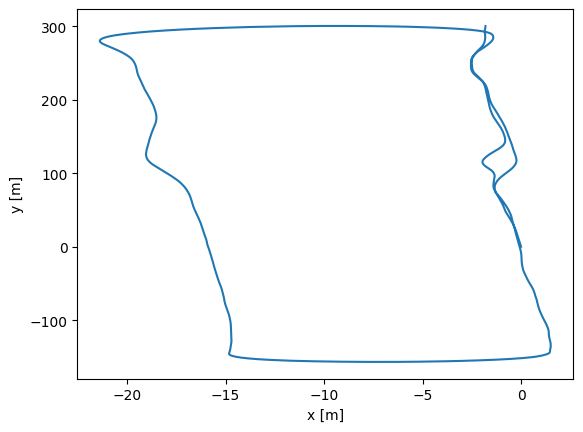

In [8]:
plt.plot(gt_poses[:,:,3][:,0], gt_poses[:,:,3][:,2])
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.show()